In [1]:
#import the library:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data:

In [4]:
df = pd.read_csv('full_data_fraud.csv')
df = df[['category', 'trans_date', 'is_fraud', 'merchant', 'amt', 'cc_num','gender']]

In [5]:
# Preprocess 'trans_date' column

In [6]:
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['trans_date'] = df['trans_date'].apply(lambda x: x.timestamp()).astype(int)
encoded_features = pd.get_dummies(df[['category', 'merchant','gender']], drop_first=True)

In [7]:
# Drop the original 'category' and 'merchant' columns

In [8]:
df = df.drop(['category', 'merchant','gender'], axis=1)

In [9]:
# Concatenate the original DataFrame with the encoded features

In [10]:
df = pd.concat([df, encoded_features], axis=1)

In [11]:
# Upsample minority class

In [12]:
majority_data = df[df['is_fraud'] == 0]
minority_data = df[df['is_fraud'] == 1]
upsampled_minority_data = resample(minority_data, replace=True, n_samples=len(majority_data), random_state=42)
upsampled_data = pd.concat((majority_data, upsampled_minority_data))
class_counts = upsampled_data['is_fraud'].value_counts()

In [13]:
# Visualize the value of 'is_fraud' after upsampled

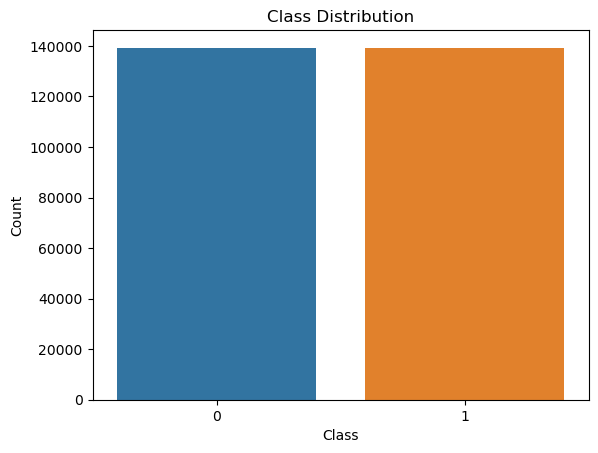

In [14]:
sns.barplot(x=class_counts.index, y=class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [15]:
#Feature Selection

In [16]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [17]:
#Split train and test

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Define the hyperparameters and their corresponding values

In [20]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [None, 5, 10, 20]
}

In [21]:
# Create an instance of the decision tree classifier

In [22]:
model = DecisionTreeClassifier()

In [23]:
# Perform grid search with cross-validation

In [24]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [25]:
# Retrieve the best hyperparameters and the best score

In [26]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [27]:
# Rebuild the decision tree model with the best hyperparameters

In [28]:
model = DecisionTreeClassifier(**best_params)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=10)

In [29]:
# Make predictions on the test set

In [30]:
y_pred = model.predict(x_test)

In [31]:
# Model evaluation

In [32]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [33]:
#Print the result:

In [34]:
#print("Best Parameters:", best_params)
#print("Best Score:", best_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9985428312073001
Precision: 0.6538461538461539
Recall: 0.44155844155844154
F1-Score: 0.5271317829457364


In [35]:
#visualize

In [36]:
import pydotplus
from sklearn.tree import export_graphviz

plt.figure(figsize=(20, 10))
export_graphviz(
    model,
    out_file="tree.dot",
    feature_names=X.columns,
    class_names=['Not Fraud', 'Fraud'],
    filled=True
)
plt.show()

# Convert the DOT file to a PNG image
graph = pydotplus.graph_from_dot_file("tree.dot")
graph.write_png("decision_tree.png")

<Figure size 2000x1000 with 0 Axes>

True

In [37]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 716.85
|   |--- feature_1 <= 257.46
|   |   |--- feature_1 <= 209.83
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- feature_583 <= 0.50
|   |   |   |   |   |--- feature_229 <= 0.50
|   |   |   |   |   |   |--- feature_697 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_697 >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_229 >  0.50
|   |   |   |   |   |   |--- feature_2 <= 4534999892753383424.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  4534999892753383424.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_583 >  0.50
|   |   |   |   |   |--- feature_2 <= 4485000013797130240.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  4485000013797130240.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- feature_1 <= 21.26
|   |   |   |   |   |--- feature_92 <

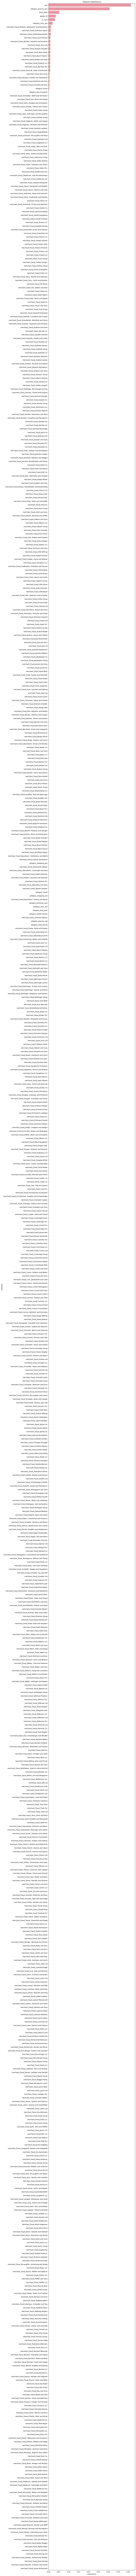

Top 10 Highest Important Features:
amt
category_grocery_pos
trans_date
gender_M
cc_num
category_misc_pos
merchant_fraud_Stanton, Jakubowski and Baumbach
merchant_fraud_Gutmann-Upton
merchant_fraud_Stoltenberg-Beatty
merchant_fraud_Lynch-Wisozk

Top 10 Lowest Important Features:
merchant_fraud_Nienow PLC
merchant_fraud_Nicolas, Hills and McGlynn
merchant_fraud_Nader-Maggio
merchant_fraud_Nader-Heller
merchant_fraud_Murray-Smitham
merchant_fraud_Murray Ltd
merchant_fraud_Mueller, Gerhold and Mueller
merchant_fraud_Mraz-Herzog
merchant_fraud_Mosciski, Ziemann and Farrell
merchant_fraud_Kozey-McDermott


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate feature importance
importance = model.feature_importances_
feature_names = x_train.columns
sorted_indices = importance.argsort()[::-1]  # Sort indices in descending order

# Create a bar plot of feature importance
plt.figure(figsize=(10, 300))
sns.barplot(y=feature_names[sorted_indices], x=importance[sorted_indices])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Print the top 10 highest and lowest important features
print("Top 10 Highest Important Features:")
for feature in feature_names[sorted_indices][:10]:
    print(feature)

print("\nTop 10 Lowest Important Features:")
for feature in feature_names[sorted_indices][-10:]:
    print(feature)

In [39]:
# Assuming the model is already trained and stored as 'model'
# Assuming the test data is available as 'test_data'

# Make predictions on the test data
test_predictions = model.predict(x_test)

# Group the test data by credit card number
grouped_data = zip(x_test['cc_num'], test_predictions)

# Iterate through the grouped data
for cc_num, prediction in grouped_data:
    if prediction == 1:
        print("Credit Card", cc_num, "is classified as FRAUD.")

Credit Card 346000000000000.0 is classified as FRAUD.
Credit Card 2240000000000000.0 is classified as FRAUD.
Credit Card 574000000000.0 is classified as FRAUD.
Credit Card 639000000000.0 is classified as FRAUD.
Credit Card 3590000000000000.0 is classified as FRAUD.
Credit Card 3580000000000000.0 is classified as FRAUD.
Credit Card 3560000000000000.0 is classified as FRAUD.
Credit Card 4720000000000000.0 is classified as FRAUD.
Credit Card 213000000000000.0 is classified as FRAUD.
Credit Card 378000000000000.0 is classified as FRAUD.
Credit Card 30100000000000.0 is classified as FRAUD.
Credit Card 378000000000000.0 is classified as FRAUD.
Credit Card 639000000000.0 is classified as FRAUD.
Credit Card 3550000000000000.0 is classified as FRAUD.
Credit Card 4410000000000000.0 is classified as FRAUD.
Credit Card 3570000000000000.0 is classified as FRAUD.
Credit Card 3600000000000000.0 is classified as FRAUD.
Credit Card 6570000000000000.0 is classified as FRAUD.
Credit Card 180000000000000.